<a href="https://www.analytiksinc.com">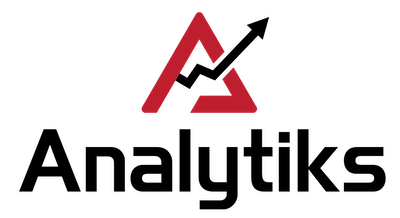</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# REGRESSION FOR MEDICAL INSURANCE COST

<b>Dataset:</b> <i>insurance.csv</i>

<b>Features</b><br>
<ul>
    <li>age: age of primary beneficiary</li>
    <li>sex: insurance contractor gender, female, male </li>
    <li>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
    height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 </li>
    <li>children: Number of children covered by health insurance / Number of dependents</li>
    <li>smoker: Smoking</li>
    <li>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
    <li>charges: Individual medical costs billed by health insurance</li>
</ul>

<b>Objectives</b>
<ul>
    <li> Load and Explore the Dataset </li>
    <li> Build model using Linear Regression, Lasso Regression, and Ridge Regression </li>
    <li> Create a table of results to compare the three models </li>

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load and Explore the Dataset

In [3]:
#Load the Insurance dataset

df = pd.read_csv('insurance.csv')

In [4]:
#Check the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Describe the dataset (numeric values)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Describe the dataset (numeric values)
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
#Keep only the numeric features for analysis and regression
df_num = df.select_dtypes(exclude='object')

In [8]:
#Get the correlation of the attributes
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


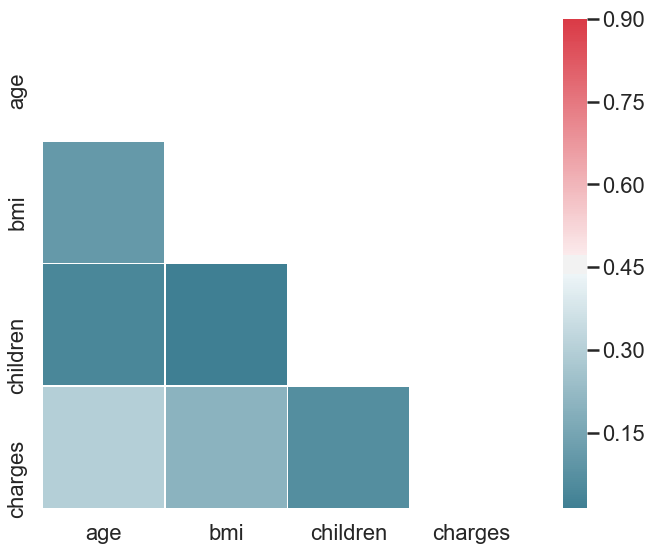

In [9]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Build the Model

In [10]:
#Set the features and the target, the target variable will be 'charges'
x = df_num.drop('charges', axis=1)
y = df.charges

In [11]:
#Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=30)

In [12]:
#Verify if split was done correctly
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((936, 3), (936,), (402, 3), (402,))

### Linear Regression

In [13]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#Predict on the test set
linreg_pred = linreg.predict(x_test)

### Lasso

In [15]:
#Instantiate the Lasso Regression Algorithm
lasso = Lasso(alpha=0.5,random_state=30)

#Train the Model
lasso.fit(x_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=30,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_pred = lasso.predict(x_test)

### Ridge

In [17]:
#Instantiate the Ridge Regression Algorithm
ridge = Ridge(alpha=0.5,random_state=30)

#Train the Model
ridge.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=30, solver='auto', tol=0.001)

In [18]:
ridge_pred = ridge.predict(x_test)

## Table of Results

In [19]:
#Create dataframe for results, index must be the algorithms, and the columns will be the metrics r2, mae, and mse
algorithms = ['linear','lasso','ridge']
metrics = ['r2','mae','mse']
r2 = [r2_score(y_test,linreg_pred), r2_score(y_test,lasso_pred), r2_score(y_test,ridge_pred)]
mae = [mean_absolute_error(y_test,linreg_pred),mean_absolute_error(y_test,lasso_pred),mean_absolute_error(y_test,ridge_pred)]
mse = [mean_squared_error(y_test,linreg_pred),mean_squared_error(y_test,lasso_pred),mean_squared_error(y_test,ridge_pred)] 

results_df = pd.DataFrame(index=algorithms, columns=metrics)
results_df.r2 = r2
results_df.mae = mae
results_df.mse = mse

In [20]:
results_df

,r2,mae,mse
linear,0.113301,8961.871120,1.285079e+08
lasso,0.113302,8961.877507,1.285077e+08
ridge,0.113301,8961.874795,1.285078e+08


In [21]:
#Create dataframe for coefficients, index must be the algorithms, and the columns will be the features, values will be the coefficients
features = x_train.columns
coef = [linreg.coef_, lasso.coef_, ridge.coef_]

coef_df = pd.DataFrame(coef, index=algorithms, columns=features)

In [22]:
coef_df

,age,bmi,children
linear,248.333702,304.082846,610.369967
lasso,248.333318,304.071931,610.018793
ridge,248.334244,304.079906,610.139802
